##Практические задачи 1 части

In [2]:
import pandas as pd
from sklearn import tree
import math as m
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [ ]:
titanic = pd.read_csv('https://stepik.org/media/attachments/course/4852/titanic.csv')

In [ ]:
titanic.shape

(891, 12)

In [ ]:
titanic.dtypes.value_counts()

int64      5
object     5
float64    2
dtype: int64

In [ ]:
students = pd.read_csv('https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv')

In [ ]:
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
(students.lunch[(students.lunch=='free/reduced')]).shape[0]/students.lunch.shape[0]

0.355

In [ ]:
means = []
mean_red_m =(students[(students.lunch=='free/reduced')])['math score'].mean()
mean_red_r =(students[(students.lunch=='free/reduced')])['reading score'].mean()
mean_red_w =(students[(students.lunch=='free/reduced')])['writing score'].mean()

mean_stan_m =(students[(students.lunch=='standard')])['math score'].mean()
mean_stan_r =(students[(students.lunch=='standard')])['reading score'].mean()
mean_stan_w =(students[(students.lunch=='standard')])['writing score'].mean()
means.extend([mean_red_m, mean_red_r, mean_red_w,mean_stan_m, mean_stan_r, mean_stan_w])
means

[58.92112676056338,
 64.65352112676057,
 63.02253521126761,
 70.03410852713178,
 71.65426356589147,
 70.8232558139535]

In [ ]:
dota = pd.read_csv('https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv')

In [ ]:
dota.head()

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


In [ ]:
dota.groupby('legs').agg({'legs':'count'}).rename(columns={'legs':'count_legs'}).sort_values('legs')

,count_legs
legs,
0,11
2,95
4,7
6,3
8,1


In [ ]:
loopa = pd.read_csv('https://stepik.org/media/attachments/course/4852/accountancy.csv')

In [ ]:
loopa.head()

,Unnamed: 0,Executor,Type,Salary
0,0,Pupa,D,63
1,1,Pupa,A,158
2,2,Pupa,D,194
3,3,Pupa,E,109
4,4,Loopa,E,184


In [ ]:
loopa.groupby(['Executor','Type']).agg({'Salary':'mean'})

Salary
Executor Type            
Loopa    A      58.000000
         B     145.166667
         C     154.333333
         D     137.714286
         E     164.000000
         F     238.000000
Pupa     A     160.833333
         B      77.000000
         C      74.500000
         D     146.500000
         E     131.200000
         F     136.250000

In [ ]:
dota.groupby(['attack_type','primary_attr']).agg({'attack_type':'count','primary_attr':'count'}).rename(columns={'attack_type':'count_att','primary_attr':'count_prim'}).sort_values(['count_att','count_prim'])

count_att  count_prim
attack_type primary_attr                       
Melee       int                   2           2
Ranged      str                   3           3
            agi                  18          18
Melee       agi                  19          19
            str                  35          35
Ranged      int                  40          40

In [ ]:
concentrations = pd.read_csv('http://stepik.org/media/attachments/course/4852/algae.csv')

In [ ]:
concentrations.head()

,species,genus,group,sucrose,alanin,citrate,glucose,oleic_acid
0,Fucus_vesiculosus,Fucus,brown,3.001472,3.711498,5.004262,2.548459,6.405165
1,Saccharina_japonica,Saccharina,brown,6.731070,1.255251,5.621499,6.013219,4.156700
2,Fucus_serratus,Fucus,brown,3.276870,0.346431,1.216767,3.623225,0.304573
3,Fucus_distichus,Fucus,brown,6.786996,6.641303,6.423606,2.272724,3.393203
4,Cladophora_fracta,Cladophora,green,3.861470,1.648450,6.940588,2.316955,2.528886


In [ ]:
#concentrations.groupby('genus').agg({'sucrose':'mean', 'alanin':'mean', 'citrate':'mean', 'glucose':'mean','oleic_acid':'mean'})
concentrations.groupby('genus').mean(numeric_only=True)

,sucrose,alanin,citrate,glucose,oleic_acid
genus,,,,,
Ascophyllum,6.825467,0.875429,5.253527,3.414961,2.432526
Cladophora,4.008792,3.997055,5.288311,2.800276,2.263472
Fucus,4.355112,3.566411,4.214878,2.814803,3.367647
Palmaria,0.704580,3.176440,5.573905,3.242090,2.245538
Saccharina,4.183596,3.524207,3.346710,4.980594,4.487252


In [ ]:
concentrations[concentrations.genus=='Fucus']['alanin'].min().round(2)
#concentrations.groupby('genus').agg(['min', 'mean', 'max']).loc['Fucus', 'alanin'].round(2)

0.35

In [ ]:
concentrations[concentrations.genus=='Fucus']['alanin'].max().round(2)


6.64

In [ ]:
concentrations[concentrations.genus=='Fucus']['alanin'].mean().round(2)

3.57

In [ ]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/income.csv')

<Axes: xlabel='None', ylabel='income'>

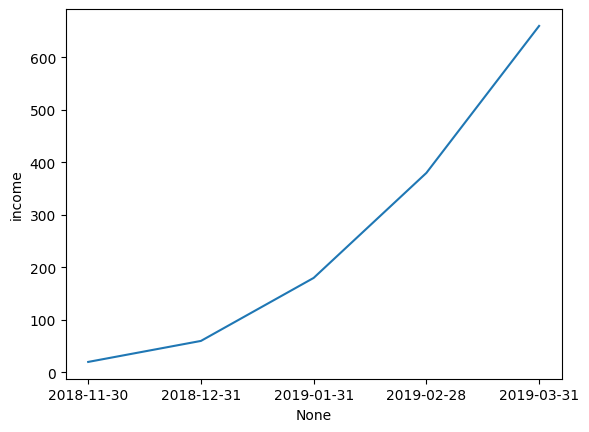

In [ ]:
sns.lineplot(x=df.index, y=df.income)

<Axes: >

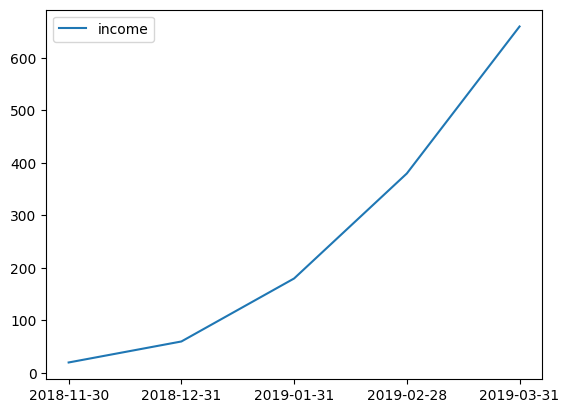

In [ ]:
sns.lineplot(data=df)

<Axes: >

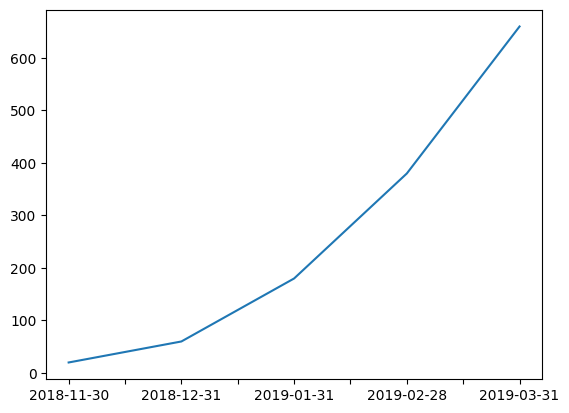

In [ ]:
df.income.plot()

<Axes: >

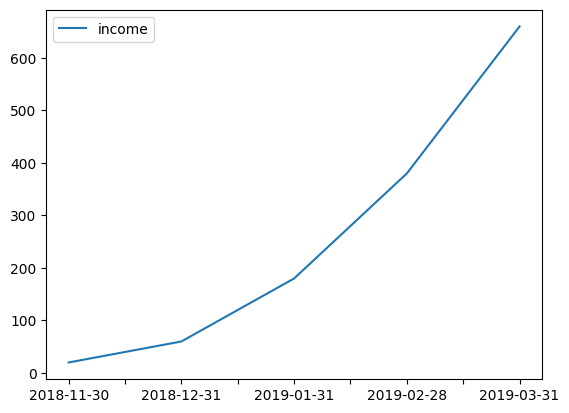

In [ ]:
df.plot()

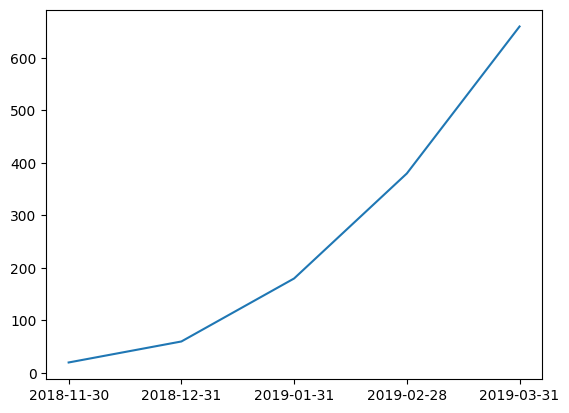

In [ ]:
plt.plot(df.index, df.income)

<Axes: >

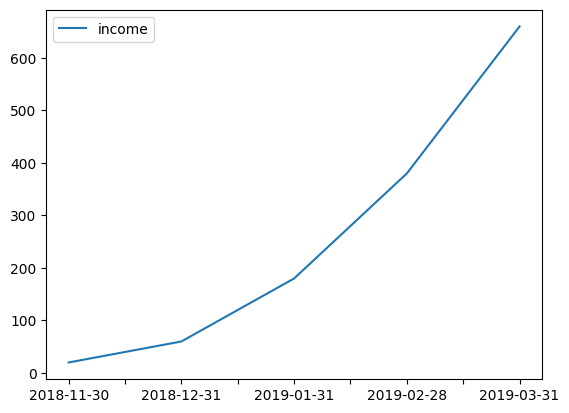

In [ ]:
df.plot(kind='line')

<Axes: >

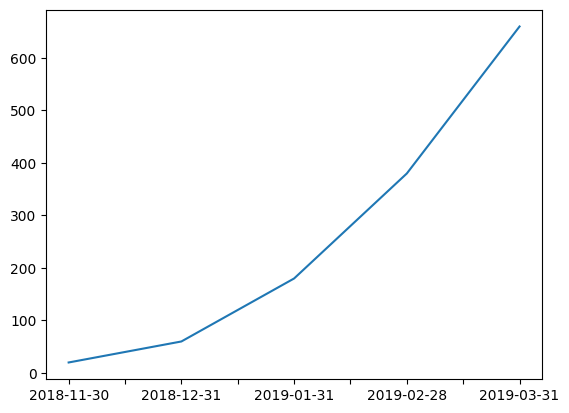

In [ ]:
df['income'].plot()

In [ ]:
df = pd.read_csv("dataset_209770_6.txt", sep=" ")

In [ ]:
df.head()

,x,y
0,607.745415,702.010043
1,599.357003,692.426165
2,107.519403,500.556734
3,194.964372,1204.847518
4,1200.321141,787.465403


<Axes: xlabel='x', ylabel='y'>

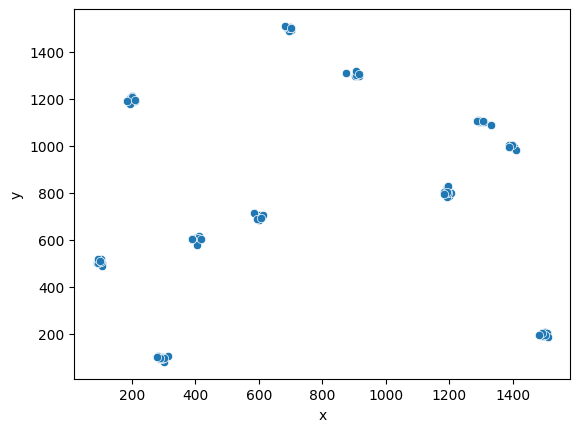

In [ ]:
sns.scatterplot(df,x='x',y='y')

In [ ]:
df = pd.read_csv("https://stepik.org/media/attachments/course/4852/genome_matrix.csv")
df.iloc[:,1:].head()

,species0,species1,species2,species3,species4
0,0.536029,0.920292,0.679708,0.840606,0.430842
1,0.920292,0.862417,0.887593,0.769754,0.203214
2,0.679708,0.887593,0.595156,0.003435,0.096052
3,0.840606,0.769754,0.003435,0.458870,0.029251
4,0.430842,0.203214,0.096052,0.029251,0.642109


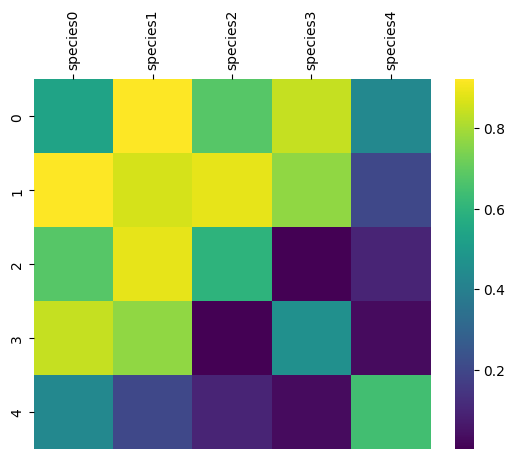

In [ ]:
g = sns.heatmap(df.iloc[:,1:], cmap="viridis")
# ваш код для создания теплокарты, укажите параметр cmap="viridis" для той же цветовой схемы
g.xaxis.set_ticks_position('top')
g.xaxis.set_tick_params(rotation=90)

In [ ]:
dota2=pd.read_csv('https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv')

In [ ]:
dota2.head()

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


In [ ]:
dota2['cnt'] = dota2.roles.str.count(',')+1
dota2.cnt.mode()

0    4
Name: cnt, dtype: int64

In [ ]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/iris.csv')
df.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0


In [ ]:
df2 = df.iloc[:,1:5]

<Axes: ylabel='Density'>

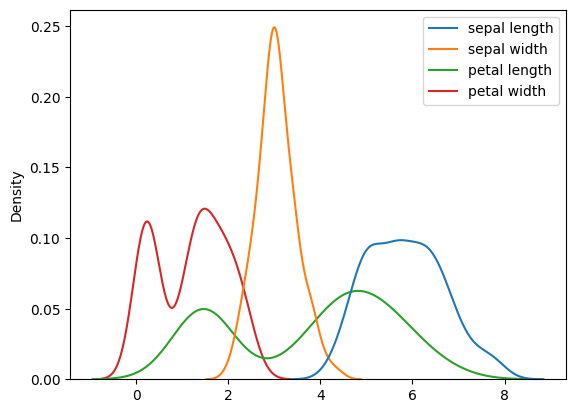

In [ ]:
sns.kdeplot(df2)

<Axes: ylabel='petal length'>

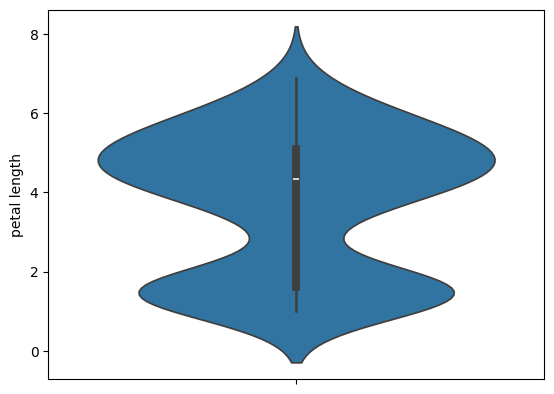

In [ ]:
sns.violinplot(df2['petal length'])

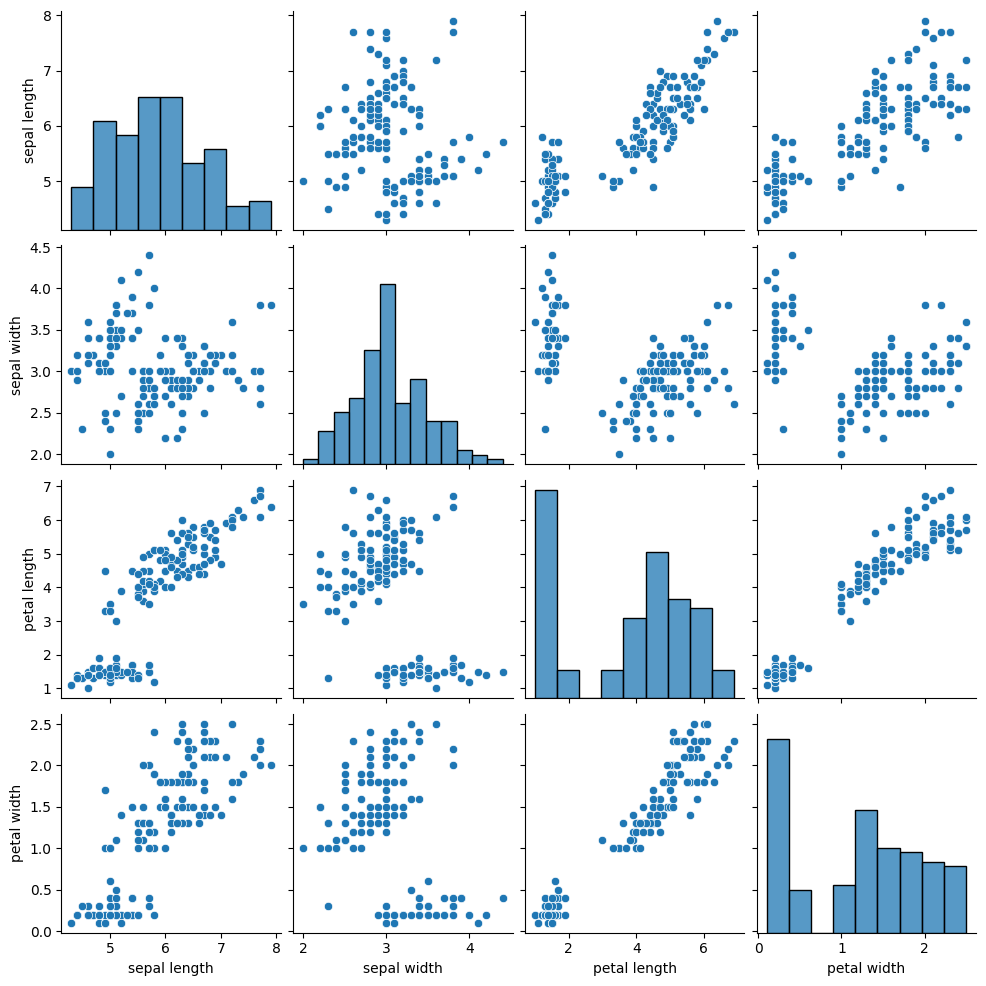

In [ ]:
sns.pairplot(df2)

In [ ]:
my_data = pd.DataFrame({'type':['A','A','B','B'], 'value':[10,14,12,23]})

In [ ]:
my_data.dtypes

type     object
value     int64
dtype: object

In [ ]:
my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat.csv')

In [ ]:
my_stat.head()

,V1,V2,V3,V4
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
4,0,10.0,B,-1.0


In [ ]:
subset_1 = my_stat.iloc[0:10,0:3:2]

In [ ]:
subset_2 = my_stat.iloc[:,[1,3]].drop([0,4])

In [ ]:
subset_1 = my_stat.query('V1>0 and  V3=="A"')
subset_2 = my_stat.query('V2!=10 or  V4>=1')

In [ ]:
my_stat=my_stat.assign(V5 = my_stat.V1+my_stat.V4, V6 = np.log(my_stat.V2))

In [ ]:
my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat_1.csv')

In [ ]:
my_stat.head(5)

,session_value,time,group,n_users
0,0.0,12,B,9
1,0.0,11,A,5
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9


In [ ]:
my_stat['session_value'] = my_stat.session_value.fillna(0)

In [ ]:
my_stat.loc[my_stat['n_users']<0,'n_users'] = my_stat.loc[my_stat['n_users']>=0,'n_users'].median()

##Stepik ML Contest 1

In [ ]:
events = pd.read_csv('https://stepik.org/media/attachments/course/4852/event_data_train.zip')
subm = pd.read_csv('https://stepik.org/media/attachments/course/4852/submissions_data_train.zip')

In [ ]:
events.head(10)

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
5,32811,1434340895,passed,17632,2015-06-15 04:01:35,2015-06-15
6,32929,1434340921,discovered,17632,2015-06-15 04:02:01,2015-06-15
7,32929,1434340921,viewed,17632,2015-06-15 04:02:01,2015-06-15
8,32929,1434340939,started_attempt,17632,2015-06-15 04:02:19,2015-06-15
9,32929,1434340944,passed,17632,2015-06-15 04:02:24,2015-06-15


In [ ]:
events['date'] = pd.to_datetime(events.timestamp, unit = 's') #s, потому что таймстемп в секундах
#https://www.geeksforgeeks.org/python-working-with-date-and-time-using-pandas/ - если понадобится

In [ ]:
events['day'] =events.date.dt.date

<Axes: xlabel='day'>

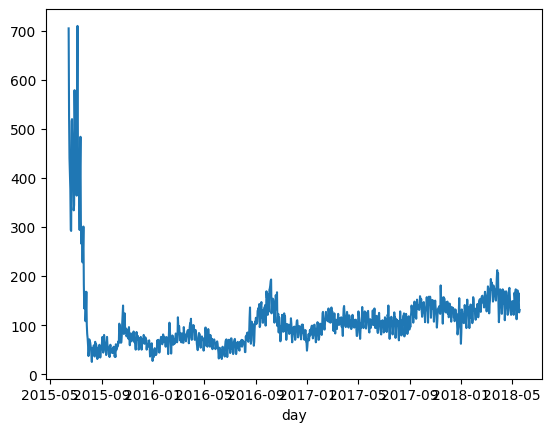

In [ ]:
events.groupby('day').user_id.nunique().plot()

In [ ]:
events.pivot_table(index='user_id',values='step_id',columns='action', aggfunc='count', fill_value=0).reset_index().head()
#филл вэлью ноль, чтобы не терять все, что не пэссд

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


<Axes: >

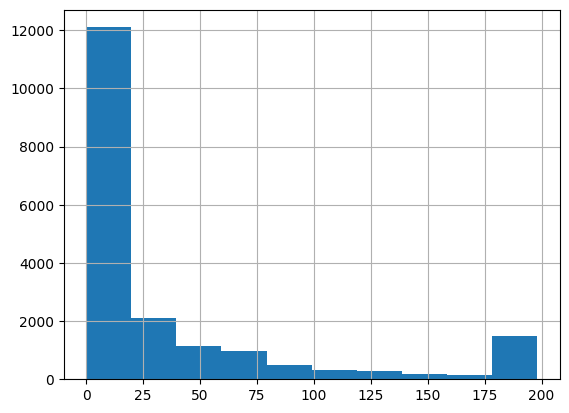

In [ ]:
events.pivot_table(index='user_id',values='step_id',columns='action', aggfunc='count', fill_value=0).reset_index().discovered.hist()

In [ ]:
subm.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [ ]:
subm[subm['submission_status']=='correct'].groupby('user_id').agg({'user_id':'count'}).rename(columns={'user_id':'count_us'}).sort_values('count_us')

,count_us
user_id,
2953,1
17260,1
17245,1
17193,1
17179,1
...,...
8461,135
6183,142
17135,168


## Тема 2.Решающие деревья

###Задача 1

[Text(0.5, 0.75, 'Лазает по деревьям <= 0.5\nentropy = 0.971\nsamples = 10\nvalue = [6, 4]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]')]

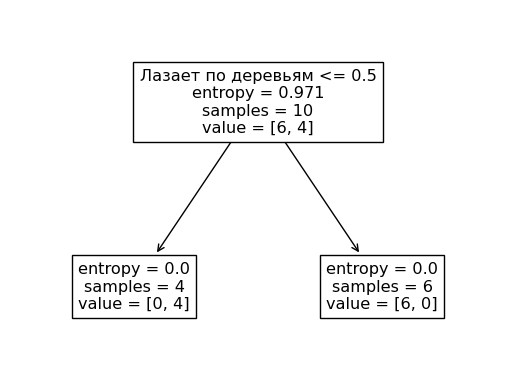

In [ ]:
dogs = pd.read_csv("https://stepik.org/media/attachments/course/4852/cats.csv")
dogs = dogs.drop('Unnamed: 0', axis=1)

dogs_X = dogs.iloc[:, :3]
dogs_y = dogs.iloc[:, 3]

dogs_clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
dogs_clf.fit(dogs_X, dogs_y)

tree.plot_tree(dogs_clf, feature_names=dogs_X.columns)

In [ ]:
dogs = pd.read_csv("https://stepik.org/media/attachments/course/4852/cats.csv")
dogs

,Unnamed: 0,Шерстист,Гавкает,Лазает по деревьям,Вид
0,0,1,1,0,собачка
1,1,1,1,0,собачка
2,2,1,1,0,собачка
3,3,1,1,0,собачка
4,4,1,0,1,котик
5,5,1,0,1,котик
6,6,1,0,1,котик
7,7,1,0,1,котик
8,8,1,1,1,котик
9,9,0,0,1,котик


In [ ]:
E_sh_0=(1/1)*m.log2((1/1)) - 0
E_sh_1=-(4/9)*m.log2((4/9)) - (5/9)*m.log2((5/9))
E_gav_0=0 - (5/5)*m.log2((5/5))
E_gav_1=-(4/5)*m.log2((4/5)) - (1/5)*m.log2((1/5))
E_laz_1=0 - (6/6)*m.log2((6/6))
E_laz_0=-(4/4)*m.log2((4/4)) - 0

In [ ]:
E = -(4/10)*m.log2(4/10) - (6/10)*m.log2(6/10)

IG_sh = E - (1/10)*E_sh_0 - (9/10)*E_sh_1
IG_gav = E - (5/10)*E_gav_0 - (5/10)*E_gav_1
IG_laz = E - (6/10)*E_laz_0 - (6/10)*E_laz_1

###Задача 2

In [ ]:
iris_train = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_iris.csv')
iris_test = pd.read_csv('https://stepik.org/media/attachments/course/4852/test_iris.csv')

In [ ]:
X = iris_train.iloc[:,1:-1]
X_test = iris_test.iloc[:,1:-1]

In [ ]:
y = iris_train.species
y_test = iris_test.species

In [ ]:
scores = pd.DataFrame()

for max_depth in range(1,100):
  clf = tree.DecisionTreeClassifier(criterion='entropy', random_state= np.random.seed(max_depth),max_depth=max_depth,)
  clf.fit(X,y)
  train_score = clf.score(X,y)
  test_score = clf.score(X_test, y_test)

  score_data=pd.DataFrame({'max_depth':[max_depth], 'train_score':[train_score],'test_score':[test_score]})
  scores = scores.append(score_data)




In [ ]:
scores_melted = pd.melt(scores, id_vars=['max_depth'],value_vars=['train_score','test_score'],var_name='type', value_name='score')
scores_melted

,max_depth,type,score
0,1,train_score,0.70
1,2,train_score,0.97
2,3,train_score,0.99
3,4,train_score,1.00
4,5,train_score,1.00
...,...,...,...
193,95,test_score,0.92
194,96,test_score,0.92
195,97,test_score,0.92
196,98,test_score,0.92


<Axes: xlabel='max_depth', ylabel='score'>

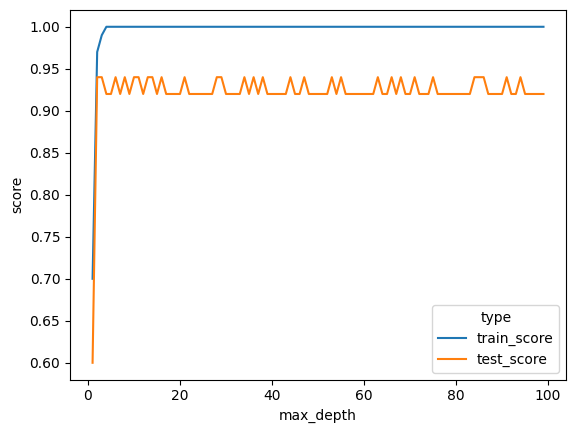

In [ ]:
sns.lineplot(scores_melted, x='max_depth', y='score',hue='type')

###Задача 3

In [ ]:
dogs=pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv')

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


In [ ]:
dogs.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


In [ ]:
dogs = pd.get_dummies(dogs)
Xd = dogs.iloc[:,:-2]
y = dogs.iloc[:,-1]

0      1
1      1
2      1
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Вид_собачка, Length: 1000, dtype: uint8

In [ ]:
clf_dogs = tree.DecisionTreeClassifier(criterion='entropy', random_state= np.random.seed(max_depth),max_depth=max_depth,)
clf_dogs.fit(Xd,y)

DecisionTreeClassifier(criterion='entropy', max_depth=99)

In [ ]:
#Определение количество собачек в тестовой выборке
df = pd.read_json('dataset_209691_15.txt')
df.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,15,18.0,1,1,0
1,34,40.8,1,1,0
2,32,38.4,1,1,0
3,18,21.6,1,1,0
4,15,18.0,1,1,0


In [ ]:
result = clf_dogs.predict(df)

pd.Series(result)[result == 0].count()

52

###Задание 4

In [ ]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_data_tree.csv')


In [ ]:
df.head()
y = df['num']
X= df[['sex','exang']]

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

[Text(0.5, 0.8333333333333334, 'exang <= 0.5\nentropy = 0.996\nsamples = 238\nvalue = [128, 110]'),
 Text(0.25, 0.5, 'sex <= 0.5\nentropy = 0.903\nsamples = 157\nvalue = [107, 50]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.612\nsamples = 53\nvalue = [45, 8]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.973\nsamples = 104\nvalue = [62, 42]'),
 Text(0.75, 0.5, 'sex <= 0.5\nentropy = 0.826\nsamples = 81\nvalue = [21, 60]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.954\nsamples = 16\nvalue = [6, 10]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.779\nsamples = 65\nvalue = [15, 50]')]

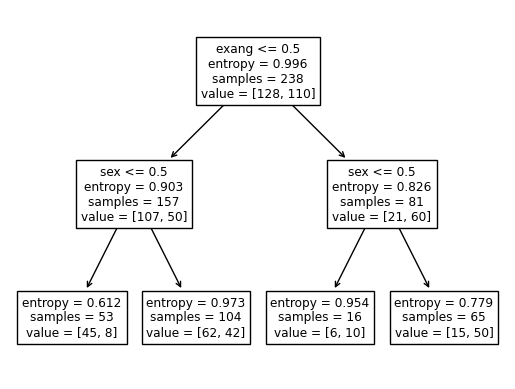

In [ ]:
tree.plot_tree(clf, feature_names=X.columns)

In [ ]:
N=238
n0=157
n1=81
E0=0.903
E1=0.826
IG = 0.996 - (n0*E0 + n1*E1)/N
IG

0.11920588235294105

###Задание 5

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

predicted = dt.predict(X_test)

###Задание 6

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data
y = iris.target
clf = DecisionTreeClassifier()
parametrs = {'max_depth': range (1,10),
              'min_samples_leaf': range (1,10),
              'min_samples_split': range (2,10)}
search = GridSearchCV(clf, parametrs, cv=5)
best_tree = search.fit(X, y).best_estimator_

###Задание 7

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

y_train = train['y']
X_train = train.drop('y', axis=1)

clf = DecisionTreeClassifier()
parametrs = {'max_depth': range (1,10),
              'min_samples_leaf': range (1,10),
              'min_samples_split': range (2,10)}
search = GridSearchCV(clf, parametrs, cv=5)
best_tree = search.fit(X_train, y_train).best_estimator_
predictions = search.predict(test)

###Stepik ML Contest 2

In [8]:
subm = pd.read_csv('https://stepik.org/media/attachments/course/4852/submissions_data_train.zip')

In [9]:
subm.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [28]:
subm1=subm[subm['submission_status']=='wrong'].groupby(['step_id','user_id']).agg({'timestamp':'max'})
subm2 = subm1.groupby('step_id').count().sort_values('timestamp', ascending=False)

In [29]:
subm2

,timestamp
step_id,
31978,3423
32031,3255
31972,3064
32202,2614
31971,2517
...,...
33681,300
31986,274
33998,251


In [31]:
submissions_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/submissions_data_train.zip')

submissions_data_by_step = submissions_data \
    .pivot_table(values='timestamp', index=['user_id', 'step_id'], aggfunc = 'max',
                 columns='submission_status', fill_value=0) \
    .reset_index()

submissions_data_by_step['is_solved'] = submissions_data_by_step.correct > 0

users_max_time = submissions_data.groupby('user_id', as_index=False) \
    .agg({'timestamp': 'max'}) \
    .rename(columns={'timestamp': 'last_timestamp'})


not_solved_steps = submissions_data_by_step[submissions_data_by_step.is_solved == False]

not_solved_steps = not_solved_steps.merge(users_max_time, on='user_id')

not_solved_steps['is_last_action'] = not_solved_steps.wrong == not_solved_steps.last_timestamp

not_solved_steps_last_action = not_solved_steps[not_solved_steps.is_last_action == True]

not_solved_steps_last_action.groupby('step_id', as_index=False) \
    .agg({'user_id': 'count'}).sort_values('user_id', ascending=False).head()

,step_id,user_id
4,31978,151
28,32812,130
11,32031,95
19,32202,88
42,33481,78


##Random forest

###Задание 1

In [64]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [36]:
df = pd.read_csv('heart-disease.csv')

In [37]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [38]:
X_train = df.iloc[:,:-1]
y_train=df.target

In [40]:
np.random.seed(0)
rf = RandomForestClassifier(n_estimators=15,max_depth=5)
rf.fit(X_train,y_train)


RandomForestClassifier(max_depth=5, n_estimators=15)

<Axes: >

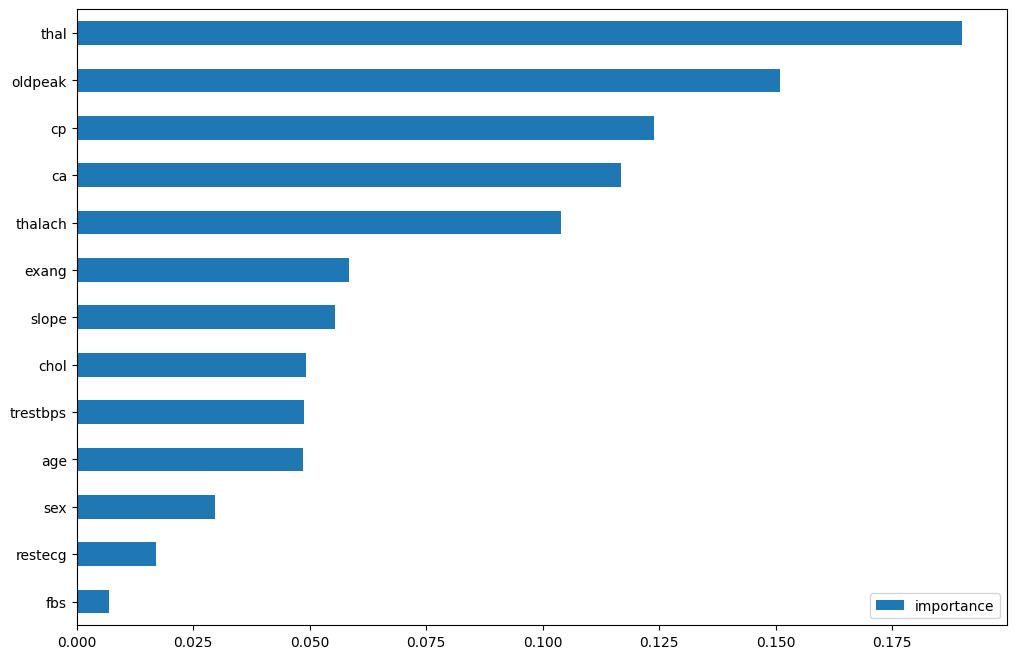

In [41]:
imp = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

###Задача 2

In [45]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/training_mush.csv')

In [46]:
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [48]:
X_train = df.iloc[:,:-1]
y_train=df['class']

In [54]:
clf = RandomForestClassifier(random_state=0)
parametrs = {'max_depth': range (1,13,2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2),
             'n_estimators': range(10,51,10)}
search = GridSearchCV(clf, parametrs, cv=3,n_jobs=-1)
new = search.fit(X_train, y_train).best_estimator_



In [56]:
pd.DataFrame(new.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance')

,importance
gill-attachment,0.000000
veil-type,0.000000
cap-shape,0.002577
cap-surface,0.003130
stalk-color-below-ring,0.006253
stalk-shape,0.007563
veil-color,0.010881
ring-number,0.013910
stalk-color-above-ring,0.017689
cap-color,0.021773


In [59]:
X_test = pd.read_csv('https://stepik.org/media/attachments/course/4852/testing_mush.csv')


In [62]:
search.best_estimator_.predict(X_test).sum()

976

In [66]:
predictions = search.best_estimator_.predict(X_train)

In [67]:
conf_matrix = confusion_matrix(y_train,predictions)

<Axes: >

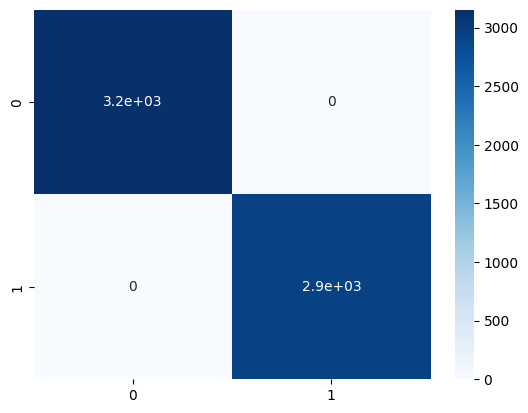

In [68]:
sns.heatmap(confusion_matrix(y_train,predictions), annot=True, cmap="Blues")

### Задача 3

In [31]:
data = pd.read_csv('https://stepik.org/media/attachments/course/4852/invasion.csv')

In [33]:
# 2. Определяем матрицу признаков X и целевую переменную y

X = data.drop('class', axis=1)
y = data['class']

# 3. Создаем классификатор случайного леса
clf = RandomForestClassifier()

# 4. Задаем параметры для поиска наилучших параметров
params = { 'max_depth': range(1, 21),

           'min_samples_split': range(1, 8, 2),

           'min_samples_leaf': range(1, 8),

           'max_features': range(2, 8, 2) }

# 5. Создаем объект GridSearchCV с указанными параметрами
search = GridSearchCV(estimator=clf, param_grid=params, cv=3)

# 6. Выполняем поиск наилучших параметров
search.fit(X, y)

# 7. Получаем лучшую модель после выполнения GridSearchCV
best_clf = search.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1260 fits failed out of a total of 5040.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1260 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn

In [34]:
# 8. Считываем operative_information.csv

operative_info = pd.read_csv('https://stepik.org/media/attachments/course/4852/operative_information.csv')

# 9. Выполняем предсказания на operative_information

y_pred = best_clf.predict(operative_info)

# 10. Выполняем подсчет количества кораблей каждого класса

ship_counts = pd.Series(y_pred).value_counts()

# Выводим результаты

print("Число крейсеров:", ship_counts['cruiser'])
print("Число транспортников:", ship_counts['transport'])
print("Число истребителей:", ship_counts['fighter'])

Число крейсеров: 231
Число транспортников: 594
Число истребителей: 675


<Axes: >

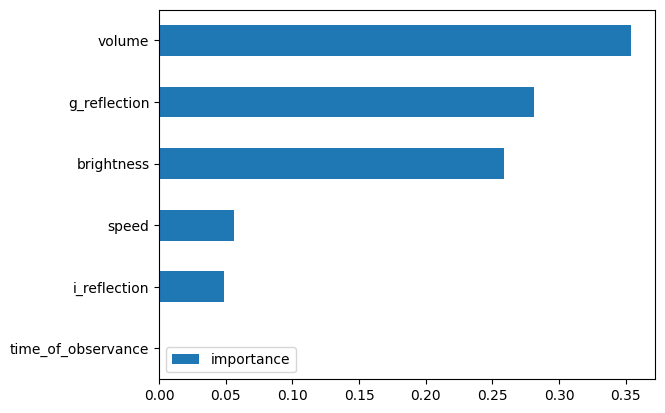

In [43]:
imd = pd.DataFrame(best_clf.feature_importances_, index = X.columns,columns=['importance'])
imd.sort_values('importance').plot(kind='barh')

### Задание 4

In [45]:
df2 = pd.read_csv('https://stepik.org/media/attachments/course/4852/space_can_be_a_dangerous_place.csv')

In [47]:
df2.head()
X_train = df2.iloc[:,:-1]
y_train = df2.iloc[:,-1]

In [49]:
clf2= RandomForestClassifier()

In [51]:
new2 = clf2.fit(X_train,y_train)

<Axes: >

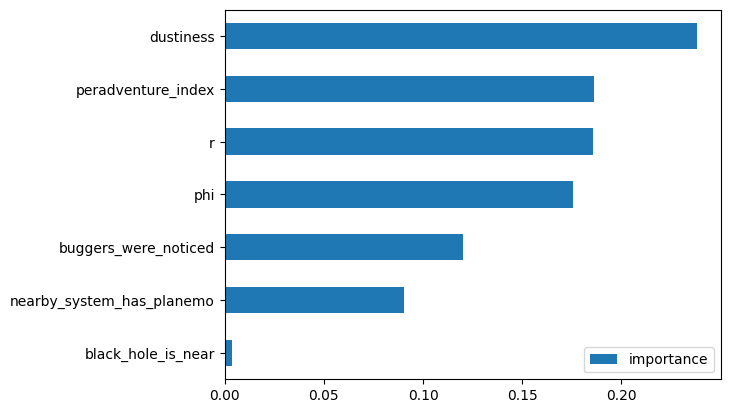

In [56]:
imp2 = pd.DataFrame(new2.feature_importances_,index=X_train.columns,columns=['importance'])
imp2.sort_values('importance').plot(kind='barh')

In [58]:
df = pd.DataFrame(range(10000000))

%time df.apply(np.mean)
%time df.apply('mean')
%time df.describe().loc['mean']
%time df.mean(axis=0)

CPU times: user 18 ms, sys: 0 ns, total: 18 ms
Wall time: 18 ms
CPU times: user 19 ms, sys: 0 ns, total: 19 ms
Wall time: 17.5 ms
CPU times: user 240 ms, sys: 147 ms, total: 387 ms
Wall time: 383 ms
CPU times: user 16.1 ms, sys: 0 ns, total: 16.1 ms
Wall time: 16.1 ms


0    4999999.5
dtype: float64

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline

stock=pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/amzn_stock.csv', index_col='Date', parse_dates=True)
stock.head()
stock.index
stock['2010']
stock['2010-02':'2011-03']
stock.resample('2h').asfreq()
stock.resample('1w').mean()
stock.head(10)
stock.rolling(3)
stock.rolling(3).mean()
stock.rolling(3, min_periods=1).mean()
stock.expanding(3).mean()
stock.ewm(alpha=0.7).mean()
stock['Open'].plot()
ns=stock['Open'].rolling(10, min_periods=1).mean()
stock['Open'].plot()
ns.plot()